In [582]:
import pandas as pd
import numpy as np
import spacy
import nltk
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.metrics import f1_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load in your data from kaggle

In [583]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [584]:
train.head()

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, ...",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late ...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in...",466954


In [585]:
train.sentiment.value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

In [586]:
train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

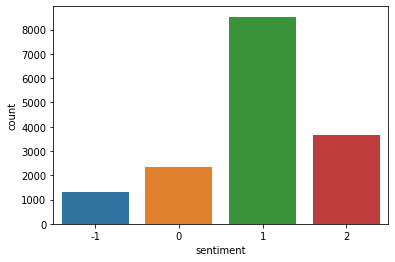

In [587]:
sns.countplot(x = 'sentiment', data = train)

In [604]:
X = train['message'] 
y = train['sentiment']

* **Convert to Lowercase**

In [605]:
X = [i.lower() for i in X]

* **Removing web-urls**

In [606]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'

X = [re.sub(pattern_url,"url-web",i) for i in X]

In [607]:
X = [re.sub('^[0-9]+', '', i) for i in X]

* **Removing special characters**

In [608]:
X = [re.sub("\\W"," ",i) for i in X]

* **Stemming**

In [609]:
stem = PorterStemmer()
def stemming(row):
    row=re.split("\\s+",row)
    return ' '.join(stem.stem(i) for i in row)

* **Tokenizing**

In [610]:
def tokenizer(row):
    row=re.sub("\\W"," ",row)
    return re.split("\\s+",row)

In [611]:
vectorizer = TfidfVectorizer(ngram_range=(1,2),
                             tokenizer=tokenizer,
                             min_df=2,
                             max_df=0.80,
                             analyzer='word',
                             smooth_idf=False, 
                             preprocessor=stemming)

X_vectorized = vectorizer.fit_transform(X)

## Lets build some classification models!

In [612]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized,y,test_size=0.30, shuffle=True, random_state=5)

In [613]:
ln_svc = LinearSVC()
ln_svc.fit(X_train, y_train)
ln_svc_pred = ln_svc.predict(X_test)

In [614]:
f1_score(y_test, ln_svc_pred, average="macro")

0.673193100227431

## Getting our test set ready

In [615]:
testx = test['message']
test_vect = vectorizer.transform(testx)

## Making predictions on the test set and adding a sentiment column to our original test df

In [617]:
y_pred = lsvc.predict(test_vect)

In [618]:
test['sentiment'] = y_pred

## Creating an output csv for submission

In [619]:
test[['tweetid','sentiment']].to_csv('testsubmission.csv', index=False)